Answer.1 Diagonalize the matrix, M.

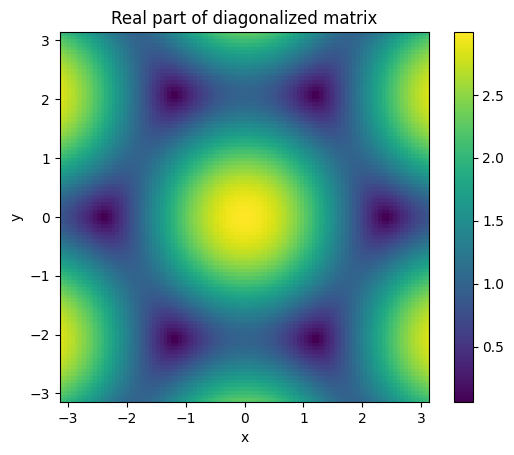

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function F(x,y)
def F(x,y):
    return np.exp(1j*y) + 2*np.exp(-1j*y/2)*np.cos(np.sqrt(3)*x/2)

# Define the matrix M
def M(x,y):
    f = F(x,y)
    return np.array([[0, f], [np.conj(f), 0]])

# Generate a grid of (x,y) values
x = np.linspace(-np.pi, np.pi, num=100)
y = np.linspace(-np.pi, np.pi, num=100)
X, Y = np.meshgrid(x, y)

# Evaluate M for each (x,y) value in the grid
M_evaluated = np.zeros((2, 2, len(x), len(y)), dtype=np.complex128)
for i in range(len(x)):
    for j in range(len(y)):
        M_evaluated[:,:,i,j] = M(X[i,j], Y[i,j])

# Diagonalize M for each (x,y) value in the grid
eigenvalues = np.zeros((2, len(x), len(y)), dtype=np.complex128)
eigenvectors = np.zeros((2, 2, len(x), len(y)), dtype=np.complex128)
for i in range(len(x)):
    for j in range(len(y)):
        eigvals, eigvecs = np.linalg.eig(M_evaluated[:,:,i,j])
        eigenvalues[:,i,j] = eigvals
        eigenvectors[:,:,i,j] = eigvecs

# Plot the real part of the diagonalized matrix for each (x,y) value in the grid
diag_vals = eigenvalues[0,:,:].real
plt.imshow(diag_vals, extent=(-np.pi, np.pi, -np.pi, np.pi))
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Real part of diagonalized matrix')
plt.show()


Answer.2 plot the eigenvalues as surface plots on the (x,y)-plane


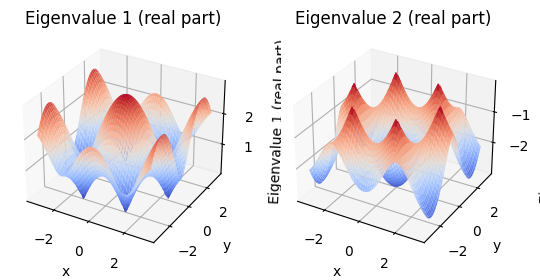

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function F(x,y)
def F(x,y):
    return np.exp(1j*y) + 2*np.exp(-1j*y/2)*np.cos(np.sqrt(3)*x/2)

# Define the matrix M
def M(x,y):
    f = F(x,y)
    return np.array([[0, f], [np.conj(f), 0]])

# Generate a grid of (x,y) values
x = np.linspace(-np.pi, np.pi, num=100)
y = np.linspace(-np.pi, np.pi, num=100)
X, Y = np.meshgrid(x, y)

# Evaluate M for each (x,y) value in the grid
M_evaluated = np.zeros((2, 2, len(x), len(y)), dtype=np.complex128)
for i in range(len(x)):
    for j in range(len(y)):
        M_evaluated[:,:,i,j] = M(X[i,j], Y[i,j])

# Diagonalize M for each (x,y) value in the grid
eigenvalues = np.zeros((2, len(x), len(y)), dtype=np.complex128)
eigenvectors = np.zeros((2, 2, len(x), len(y)), dtype=np.complex128)
for i in range(len(x)):
    for j in range(len(y)):
        eigvals, eigvecs = np.linalg.eig(M_evaluated[:,:,i,j])
        eigenvalues[:,i,j] = eigvals
        eigenvectors[:,:,i,j] = eigvecs

# Plot the eigenvalues as surface plots on the (x,y)-plane
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, eigenvalues[0,:,:].real, cmap='coolwarm')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('Eigenvalue 1 (real part)')
ax1.set_title('Eigenvalue 1 (real part)')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, eigenvalues[1,:,:].real, cmap='coolwarm')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('Eigenvalue 2 (real part)')
ax2.set_title('Eigenvalue 2 (real part)')

plt.show()
